<a href="https://colab.research.google.com/github/jamesqiu2021/DSCI-401-QW/blob/main/HW_2_Qiu_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

Teams = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Teams.csv")
print(Teams.columns)
Teams.head

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', 'X2B',
       'X3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')


<bound method NDFrame.head of       yearID lgID teamID franchID divID  Rank    G  Ghome    W    L  ...   DP  \
0       1871  NaN    BS1      BNA   NaN     3   31    NaN   20   10  ...   24   
1       1871  NaN    CH1      CNA   NaN     2   28    NaN   19    9  ...   16   
2       1871  NaN    CL1      CFC   NaN     8   29    NaN   10   19  ...   15   
3       1871  NaN    FW1      KEK   NaN     7   19    NaN    7   12  ...    8   
4       1871  NaN    NY2      NNA   NaN     5   33    NaN   16   17  ...   14   
...      ...  ...    ...      ...   ...   ...  ...    ...  ...  ...  ...  ...   
2980    2021   NL    SLN      STL     C     2  162   81.0   90   72  ...  137   
2981    2021   AL    TBA      TBD     E     1  162   81.0  100   62  ...  130   
2982    2021   AL    TEX      TEX     W     5  162   81.0   60  102  ...  146   
2983    2021   AL    TOR      TOR     E     4  162   80.0   91   71  ...  122   
2984    2021   NL    WAS      WSN     E     5  162   81.0   65   97  ...  116  

# 1 (a) Create a data frame that is a subset of the Teams data frame that contains only the years from 2000 through 2009 and the variables yearID, W, and L.

In [3]:
Teams[["yearID","W","L"]][Teams.yearID >= 2000][Teams.yearID <= 2009]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,yearID,W,L
2325,2000,82,80
2326,2000,85,77
2327,2000,95,67
2328,2000,74,88
2329,2000,85,77
...,...,...,...
2620,2009,91,71
2621,2009,84,78
2622,2009,87,75
2623,2009,75,87


# 1 (b) How many years did the Chicago Cubs (teamID is \CHN") hit at least 200 HRs in a season and what was the median number of wins in those seasons.

In [4]:
Myteams = Teams[Teams.teamID == "CHN"] [Teams.HR >= 200] 
len(Myteams) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


7

#There were 7 years that CHN hit at least 200HRs.

In [5]:
Myteams_average_W = Myteams["W"].mean()
Myteams_average_W

81.28571428571429

# 1(c) Create a factor called election that divides the yearID into 4-year blocks that correspond to U.S. presidential terms. The first presidential term started in 1788. They each last 4 years and are still on the schedule set in 1788. During which term have the most home runs been hit?

In [6]:
from numpy import linspace
yearBreaks =np.arange(1788,2021,4)
Teams['election'] = pd.cut(Teams["yearID"],bins = yearBreaks)
Myteams2 = Teams[["election",'HR']].groupby("election")["HR"].sum().sort_values(ascending=False)
Myteams2

election
(2000, 2004]    21175
(1996, 2000]    20925
(2016, 2020]    20770
(2004, 2008]    20238
(2012, 2016]    19366
(2008, 2012]    19141
(1992, 1996]    16379
(1984, 1988]    15053
(1976, 1980]    13120
(1988, 1992]    12821
(1968, 1972]    11945
(1980, 1984]    11719
(1960, 1964]    11197
(1972, 1976]    10684
(1964, 1968]     9725
(1956, 1960]     8820
(1952, 1956]     8531
(1948, 1952]     7341
(1936, 1940]     5921
(1944, 1948]     5342
(1928, 1932]     5341
(1932, 1936]     5100
(1940, 1944]     4341
(1924, 1928]     4047
(1920, 1924]     3868
(1888, 1892]     2433
(1912, 1916]     2198
(1892, 1896]     1981
(1884, 1888]     1863
(1916, 1920]     1647
(1908, 1912]     1577
(1900, 1904]     1475
(1896, 1900]     1273
(1880, 1884]     1181
(1904, 1908]     1110
(1872, 1876]      167
(1876, 1880]      167
(1868, 1872]       84
(1792, 1796]        0
(1828, 1832]        0
(1796, 1800]        0
(1800, 1804]        0
(1804, 1808]        0
(1808, 1812]        0
(1812, 1816]        0
(

# 1(d) Make a line plot of total home runs per season and stratify by league. Remove observations where league is missing.


In [7]:
THRteams = Teams[["lgID","yearID","HR"]].groupby("lgID")["HR"].sum().sort_values(ascending=False)
THRteams

lgID
AL    157488
NL    155413
AA      1907
FL       546
PL       320
UA       125
Name: HR, dtype: int64

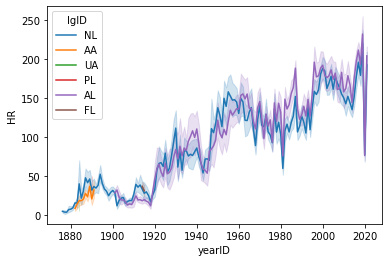

In [8]:
import seaborn as sns
sns.lineplot(data=Teams, x="yearID", y="HR", hue="lgID")

In [9]:
pip install dfply

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 612 kB 5.0 MB/s 


# 1(e) Create an indicator variable called winning_record" which is defined as TRUE if the number of wins is greater than the number of losses and FALSE otherwise. Plot a scatter plot of Runs (R) vs Runs against (RA) with the color of each point showing whether that team had a winning record or not.

In [10]:
Teams["Winning_record"]=np.where(Teams["W"] > Teams["L"],"TRUE","FALSE")                           
print (Teams)

      yearID lgID teamID franchID divID  Rank    G  Ghome    W    L  ...  \
0       1871  NaN    BS1      BNA   NaN     3   31    NaN   20   10  ...   
1       1871  NaN    CH1      CNA   NaN     2   28    NaN   19    9  ...   
2       1871  NaN    CL1      CFC   NaN     8   29    NaN   10   19  ...   
3       1871  NaN    FW1      KEK   NaN     7   19    NaN    7   12  ...   
4       1871  NaN    NY2      NNA   NaN     5   33    NaN   16   17  ...   
...      ...  ...    ...      ...   ...   ...  ...    ...  ...  ...  ...   
2980    2021   NL    SLN      STL     C     2  162   81.0   90   72  ...   
2981    2021   AL    TBA      TBD     E     1  162   81.0  100   62  ...   
2982    2021   AL    TEX      TEX     W     5  162   81.0   60  102  ...   
2983    2021   AL    TOR      TOR     E     4  162   80.0   91   71  ...   
2984    2021   NL    WAS      WSN     E     5  162   81.0   65   97  ...   

                         name                          park attendance  BPF  \
0       

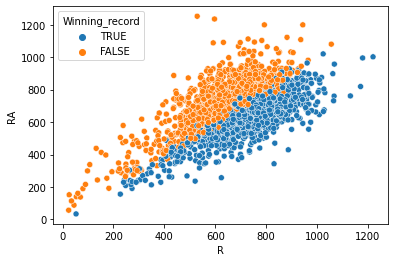

In [11]:
sns.scatterplot (x="R",y="RA",hue="Winning_record",data=Teams)

# 2(a) What month had the highest proportion of cancelled fights? What month had the lowest? Interpret any seasonal patterns.

In [12]:
pip install nycflights13

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.7 MB 5.0 MB/s 
  Created wheel for nycflights13: filename=nycflights13-0.0.3-py3-none-any.whl size=8732743 sha256=edf49047507a7a4010d602cfef3af541de1f7456ea58a98393a5b01221e40f8a
  Stored in directory: /root/.cache/pip/wheels/06/80/a2/4e4b03a8bef54cc4779cbf19b9aad738d859a70bb3b982f8e3
Successfully built nycflights13


In [13]:
from nycflights13 import flights

In [15]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [41]:
flights["Cancelled_flight"]=np.isnan(flights["arr_time"]) 
print(flights)
cancelled = flights[["month","Cancelled_flight"]].dropna(how="any").groupby("month",as_index=False).sum("Cancelled_flight").sort_values(by="Cancelled_flight",ascending=False)
cancelled

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
0                  819    

,month,Cancelled_flight
1,2,1291
5,6,1072
11,12,1059
6,7,1043
2,3,891
3,4,710
4,5,601
0,1,536
7,8,506
8,9,504


#Febrary had the most cancelled flights and October had the least cancelled flights.

In [60]:
cancelled.describe()

,month,Cancelled_flight
count,12.000000,12.000000
mean,6.500000,726.083333
std,3.605551,341.171633
min,1.000000,247.000000
25%,3.750000,505.500000
50%,6.500000,655.500000
75%,9.250000,1047.000000
max,12.000000,1291.000000


In [61]:
spring_c = 891+710+601
spring_c
summer_c = 1043+1072+506
summer_c
fall_c = 504+247+253
fall_c
winter_c= 1059+536+1291
winter_c
seasons = [spring_c,summer_c,fall_c,winter_c]
print(seasons)
seasons_max=max(seasons)
print(seasons_max)

[2202, 2053, 1004, 2886]
2886


In [69]:
from pandas.io.formats.style_render import DataFrame
season_dat={"spring":[891,710,601],"summer":[1072,1043,506],"fall":[504,247,253],"winter":[1059,536,1029]}
season_dat = pd.DataFrame(season_dat)
season_dat

,spring,summer,fall,winter
0,891,1072,504,1059
1,710,1043,247,536
2,601,506,253,1029


In [70]:
season_dat.describe()

,spring,summer,fall,winter
count,3.000000,3.000000,3.000000,3.000000
mean,734.000000,873.666667,334.666667,874.666667
std,146.482081,318.738660,146.677651,293.677260
min,601.000000,506.000000,247.000000,536.000000
25%,655.500000,774.500000,250.000000,782.500000
50%,710.000000,1043.000000,253.000000,1029.000000
75%,800.500000,1057.500000,378.500000,1044.000000
max,891.000000,1072.000000,504.000000,1059.000000


Winter had the most cancelled flights, and fall had the least cancelled flights.

In [44]:
cancelled_1 = cancelled.Cancelled_flight.sum()
cancelled_1

8713

In [51]:
cancelled_2=cancelled[cancelled.month=="3"].groupby("Cancelled_flight").sum()
cancelled_2

,month
Cancelled_flight,


# 2(b) Given that a delay is longer than an hour, what is the average time of the total delay by airport (i.e. origin)

In [ ]:
flights[flights.arr_delay > 60][["arr_delay","origin"]].groupby('origin').mean()["arr_delay"]

origin
EWR    120.080943
JFK    120.008503
LGA    124.083678
Name: arr_delay, dtype: float64

# 2(c) What is the average air time for all fights by carrier? Which carrier has the longest average air time on their fights?

In [ ]:
flights.loc[flights["air_time"].dropna()].groupby("carrier")["air_time"].mean().sort_values(ascending=False)

carrier
HA    659.000000
VX    351.620840
AS    337.993972
F9    256.986589
UA    240.252069
AA    194.802046
9E    187.837812
DL    167.237160
WN    158.692151
B6    153.263552
US    129.736885
FL    128.681829
MQ    105.108433
EV     98.932510
Name: air_time, dtype: float64

# 2(d) Keeping only fights that had a delay greater than 0, create a histogram for each month of the delay data.

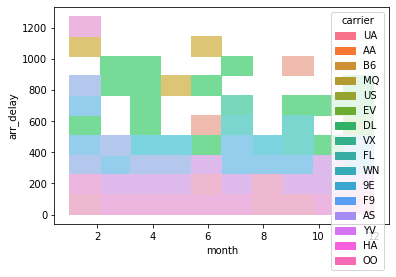

In [ ]:
delay_flights = flights[flights["arr_delay"] >0]
sns.histplot(delay_flights,x="month",y="arr_delay",hue="carrier",bins=10)

# 2(e) Create side-by-side boxplots of delay times for flights with delays 60 minutes or greater for the top

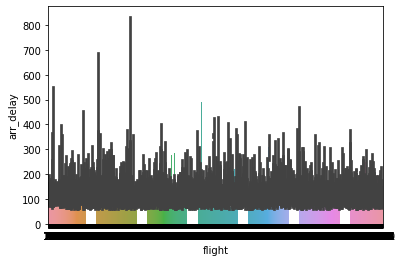

In [ ]:
g = flights[flights["arr_delay"] >=60]
sns.barplot(data=g, x="flight", y="arr_delay")